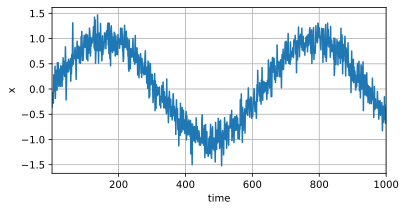

In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

T = 1000
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0, 0.2, (T,))
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

In [2]:
tau = 4
features = torch.zeros((T - tau, tau))
for i in range(tau):
    features[:, i] = x[i:T - tau + i]
labels = x[tau:].reshape((-1, 1))

batch_size, n_train = 16, 600
train_iter = d2l.load_array((features[:n_train], labels[:n_train]), 
                            batch_size, 
                            is_train=True)

In [7]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

def get_net():
    net = nn.Sequential(nn.Linear(4, 10), nn.ReLU(), nn.Linear(10, 1))
    net.apply(init_weights)
    return net

loss = nn.MSELoss()

In [8]:
def train(net, train_iter, loss, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            trainer.step()
        print(f'epoch {epoch + 1}, '
              f'loss: {d2l.evaluate_loss(net, train_iter, loss)}')
net = get_net()
train(net, train_iter, loss, 5, 0.01)

epoch 1, loss: 0.0620307528756951
epoch 2, loss: 0.05495869843779426
epoch 3, loss: 0.05248545781758271
epoch 4, loss: 0.05189895447294571
epoch 5, loss: 0.05575621093770391


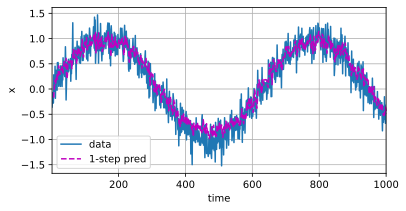

In [9]:
onestep_preds = net(features)
d2l.plot(
    [time, time[tau:]], 
    [x.detach().numpy(), onestep_preds.detach().numpy()], 'time', 'x', 
    legend=['data', '1-step pred'], xlim=[1, 1000], figsize=(6, 3))

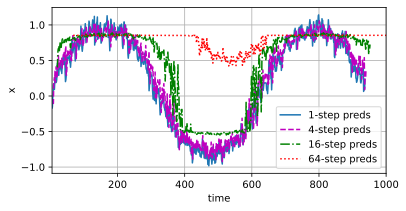

In [12]:
max_steps = 64

features = torch.zeros((T - tau - max_steps + 1, tau + max_steps))
for i in range(tau):
    features[:, i] = x[i:i + T - tau - max_steps + 1]

for i in range(tau, tau + max_steps):
    features[:, i] = net(features[:, i - tau:i]).reshape(-1)

steps = (1, 4, 16, 64)
d2l.plot([time[tau + i - 1:T - max_steps + i] for i in steps], 
         [features[:, (tau + i - 1)].detach().numpy() for i in steps],
         'time', 'x', legend=[f'{i}-step preds' for i in steps], 
         xlim=[5, 1000], figsize=(6, 3))